# INTEGRATED PROJECT - ICE

**Ice** is an online store that sells video games all over the world. 

With this Analysis we want to identify patterns that determine whether a game succeeds or not. 
This will allow us to spot potential big winners and plan advertising campaigns.

## Step 1. Open the data file and study the general information

For this analysis we will first import the libraries we will need to carry our analysis, and import and review the information collected in the dataset.

The collected data includes the following information:
- The name of the game
- Platform 
- Year of release
- Genre
- Sales in USD million in North America, Europe, Japan, and other countries.
- The critic and user scores
- Rating (ESRB), which is the Entertainment Software Rating Board, and evaluates a game's content and assigns an age rating (such as Teen or Mature).

In [1]:
# Import the libraries we will use for this analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats as st
from scipy.stats import mannwhitneyu

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

In [2]:
# Open 'Games' dataset
try:
    games_data = pd.read_csv("downloads/games.csv")
except: 
    games_data = pd.read_csv("/datasets/games.csv")
    
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# view the table's first rows
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Generate Descriptive Statistics
games_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Conclusion

After looking at the original data we can see that:
- The original table has 11 columns and 16,715 rows.
- There are columns with missing values (NaN), and we will have to deal with them..
- We will need to convert the data of a couple of columns (*'year_of_release' and 'user_score'*) to the required types, in order to interpret the data correctly.
 

## Step 2. Preparing the Data

### Replace the column names (make them lowercase).

In [5]:
# Change the column names to Lowercase 
games_data.columns = games_data.columns.str.lower()
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# filter the data with the 'user_score' = 'tbd'
tbd_data = games_data.query('user_score == "tbd"')
tbd_data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


In [7]:
# rows with 'tbd' as user_score
tbd_data.shape[0]

2424

### Convert the data to the required types.

In [8]:
# Convert the data to the required types
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Describe the columns where the data types have been changed and why.

* The 'user_score' column has 2,424 rows filled with 'tbd', meaning this score was not still determined. 

*Because we couldn't find any valid information that could help us fill these rows with an actual score, we decided to fill these missing values with the columns average or mean.*
* Originally, the **'user_score'** column had the *object* type. We changed it to *float* because this column has numeric data, just like the column 'critic_score'

### Find and deal with missing values.

In [9]:
# missing values in 'name' column
games_data['name'].isnull().sum()

2

In [10]:
games_data = games_data.dropna(how='any', subset=['name'])
games_data['name'].isnull().sum()

0

In [11]:
# missing values in 'year_of_release' column
games_data['year_of_release'].isnull().sum()

269

In [12]:
# fillna in 'year_of_release' column
games_data["year_of_release"].fillna(0, inplace = True) 
games_data['year_of_release'].isnull().sum()

0

In [13]:
# change column type from float to integer
games_data["year_of_release"] = games_data["year_of_release"].astype(int)

In [14]:
# missing values in 'critic_score' column
games_data['critic_score'].isnull().sum()

8576

In [15]:
# fillna in 'critic_score' column with the median
critic_score_median = games_data['critic_score'].median()
games_data["critic_score"].fillna(critic_score_median, inplace = True) 
games_data['critic_score'].isnull().sum()

0

In [16]:
# missing values in 'user_score' column
games_data['user_score'].isnull().sum()

9123

In [17]:
# fillna in 'user_score' column with the mean
user_score_mean = games_data["user_score"].mean()

games_data["user_score"].fillna(user_score_mean, inplace = True) 
games_data['user_score'].isnull().sum()

0

In [18]:
# rename 'Rating column'
games_data.rename(columns = {'rating':'age_rating'}, inplace = True) 

In [19]:
# missing values in 'age_rating' column
games_data['age_rating'].isnull().sum()

6764

In [20]:
# replace missing values with 'not rated'
games_data['age_rating'].fillna('not rated',  inplace = True)
games_data['age_rating'].isnull().sum()

0

In [21]:
#see the table's information after filling the missing values 
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  age_rating       16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [22]:
games_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.125046,not rated
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.125046,not rated
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71.0,7.125046,not rated
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.500000,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.600000,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.400000,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71.0,7.125046,not rated


In [23]:
# Let's se if there are any duplicates in our original data
games_data.duplicated().sum()

0

### Calculate the total sales (the sum of sales in all regions)

In [24]:
# calculate the total sales for each game
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.125046,not rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.125046,not rated,31.38


### Conclusion

-  The *'user_score'* column has 2,424 rows filled with 'tbd', meaning this score was not still determined. 
*Because we couldn't find any valid information that could help us fill these rows with an actual score, we decided to fill these missing values with the columns average or mean.*
So we changed its data type from object to float because this column has numeric data, just like the column 'critic_score.


- We dealt with the missing values the following way:
    * In the *'name'* column there where 2 missing values. We decided to delete these 2 rows completely, since we can identify the game they where referring to.

    * In the *'year_of_release'* column, we replaced the missing values with 0, meaning we don't know the exact year when the game was released. After filling the missing values, we changed the column type to 'int', because years are not decimal numbers.

    * The missing values of the column *'critic_score'* where replaced by it's median, because there seems to be some outliers in this column.
    
    * In the 'user_score' column we found the term 'tbd', meaning that the user score has not been calculated or estimated. We decided to fill the missing values of the column *'user_score'* with the mean, since there doesn't seem to be outliers.

    * The *'rating'* column was renamed *'age_rating'* to clarify the meaning of this column's information. We replaced the missing values in this column with the phrase 'not rated'.

- There where no duplicated information in our data.

** The missing values could have been a result of some technical errors during the data collection, loading and so on. 
As we can see, the missing values of the columns 'critic_score', ''user_score, and 'age_rating' concur in the same row.

- We also calculated the total sales for each game and added it in a new column *'total_sales'*.

## Step 3. Analyzing the Data

### Games per year

In [25]:
# Filter the data with 'year_of_release' different than 0
games_data = games_data.query('year_of_release != 0')
games_data.shape[0]

16444

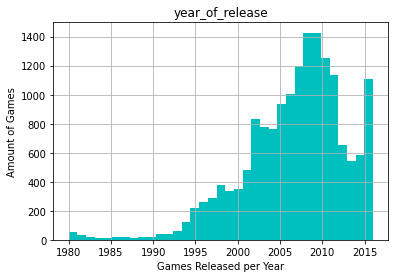

In [26]:
#games released in the different years
games_data.hist('year_of_release', bins=35, color='c')
plt.xlabel("Games Released per Year")
plt.ylabel("Amount of Games")
plt.show()

- We can see that the amount of games released per years started increasing significantly from 1994, with more than 200 games per year.

- The highest amount of games released in a year was between 2008 and 2009.

- A possible reason on the increase of the number of games over the years could be that the video games market has grown and that the new game platforms are more attractive to user. Back in the 80s and early 90s the video games indsutry was barely starting and was not so easily accessible.


### Sales per Platform

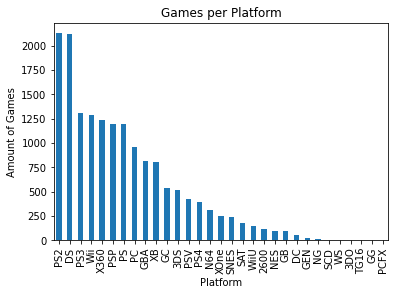

In [27]:
# 'platform' bar chart
games_data['platform'].value_counts().plot(kind='bar') 
plt.title('Games per Platform')
plt.xlabel("Platform")
plt.ylabel("Amount of Games")
plt.show()

In [28]:
# Total sales for each platform
platform_sales = games_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_sales.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


The eight platforms with the greatest total sales (above 300mm USD) are: **PS2, X360, PS3, Wii, DS, PS, PS4, GBA**

In [29]:
# Filter data with best selling platforms
best_platforms = games_data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA")')
best_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.500000,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.600000,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.400000,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,7.125046,not rated,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.600000,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.700000,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.300000,E,21.82


In [30]:
best_platforms.shape[0]

10465

In [31]:
# yearly sales per platform
platform_years = best_platforms.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'})

platform_years.rename(columns = {"total_sales": "sales_per_platform"},  
          inplace = True)

platform_years.head(15)

sales_per_platform
platform year_of_release                    
DS       1985                           0.02
         2004                          17.27
         2005                         130.14
         2006                         119.81
         2007                         146.94
         2008                         145.31
         2009                         119.54
         2010                          85.02
         2011                          26.18
         2012                          11.01
         2013                           1.54
GBA      2000                           0.07
         2001                          61.53
         2002                          74.16
         2003                          56.67

In [32]:
platform_years.reset_index(level=[1])

,year_of_release,sales_per_platform
platform,,
DS,1985,0.02
DS,2004,17.27
DS,2005,130.14
DS,2006,119.81
DS,2007,146.94
...,...,...
X360,2012,99.74
X360,2013,88.58
X360,2014,34.74


In [33]:
pip install chart_studio -U

Requirement already up-to-date: chart_studio in c:\users\aimee\anaconda3\lib\site-packages (1.1.0)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied, skipping upgrade: idna<3,>=2.5 in c:\users\aimee\anaconda3\lib\site-packages (from requests->chart_studio) (2.10)



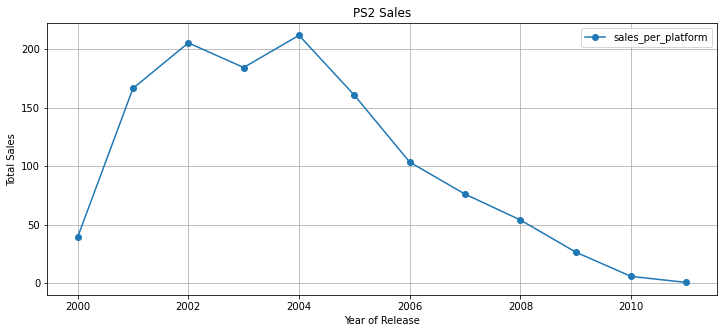

In [34]:
# 'PS2' Sales per year
(platform_years
 .query('platform == "PS2"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(12, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('PS2 Sales')
plt.show()


The PS2 platform games were released in 2000. After 4 years of increasing sales, it started decreasing. This may have been caused in part by the release of PS3 in 2006.

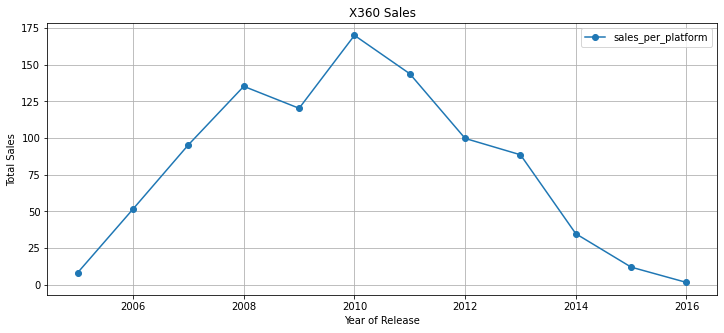

In [35]:
# 'X360' Sales per year
(platform_years
 .query('platform == "X360"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(12, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('X360 Sales')
plt.show()

X360 platform was released in 2005 and had really good sales for the first 5 years. This is good considering this platform was competing with PS3. In 2016, its game sales practically stopped.

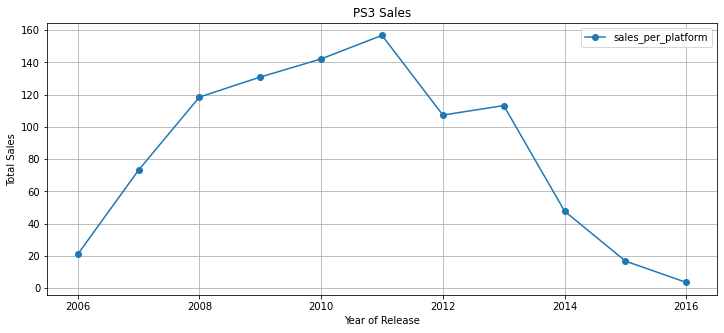

In [36]:
# 'PS3' Sales per year
(platform_years
 .query('platform == "PS3"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(12, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('PS3 Sales')
plt.show()

PS3 was the competition of the X360 platform and was released in 2006. Its higher year in sales was 2011, but these sales were still a bit lower than X360 best selling year.

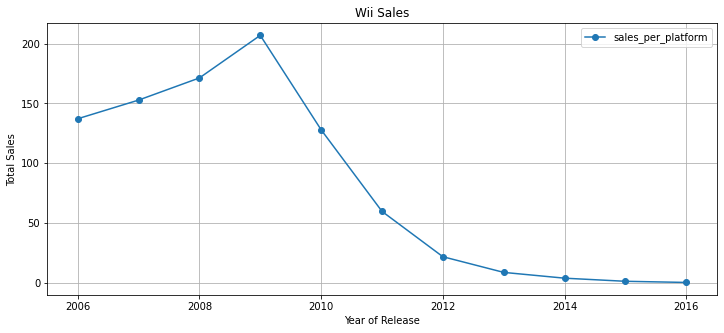

In [37]:
# 'Wii' Sales per year
(platform_years
 .query('platform == "Wii"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(12, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('Wii Sales')
plt.show()

Wii was also released in 2006, and its sales increased constantly for the first 3 years, than started dropping significantly until disappearing in 2016.

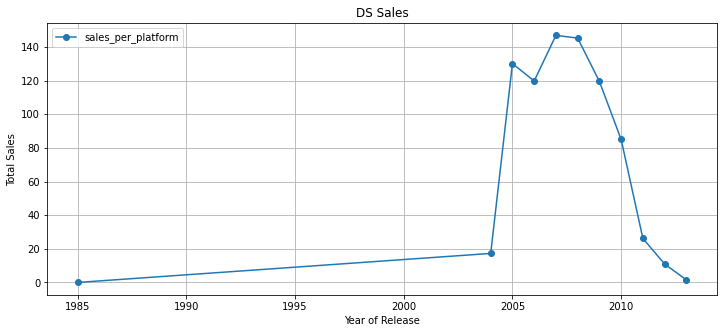

In [38]:
# 'DS' Sales per year
(platform_years
 .query('platform == "DS"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(12, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('DS Sales')
plt.show()

After filtering and grouping the data, we noticed there is an error in the DS. The DS was released in 2004, and there is one row with information of sales in 1985. 

During its first year the sales increased significantly, and after 3 years they started dropping until 2016. 

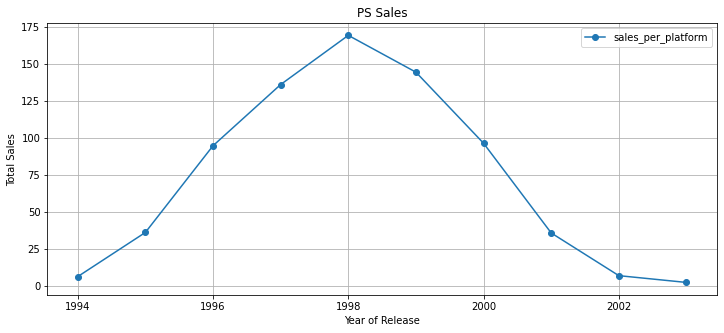

In [39]:
# 'PS' Sales per year
(platform_years
 .query('platform == "PS"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(12, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('PS Sales')
plt.show()

The first PS platform was released in 1994. For the first 4 years its sales continued increasing and then started going down.

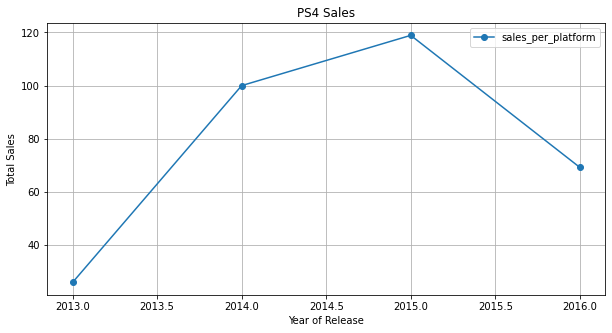

In [40]:
# 'PS4' Sales per year
(platform_years
 .query('platform == "PS4"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(10, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('PS4 Sales')
plt.show()

PS4 was released in 2013 and had really good sales for the first couple of years, but in 2016 they decreased.

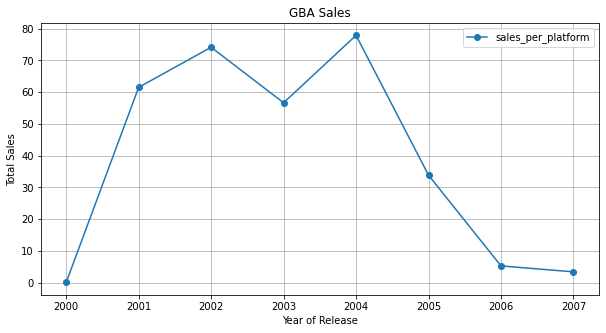

In [41]:
# 'GBA' Sales per year
(platform_years
 .query('platform == "GBA"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(10, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('GBA Sales')
plt.show()

the GBA platform was released in 2000, so it was competing with PS2. Though it had good sales, it never reached the levels of the PS2.

Out of these 8 top selling platforms we can see that:
- Only the *PS4* had over 60mm USD of sales by 2016. This is mainly because, the majority of the other platforms have been discontinued (PS - PS2 -Ps3...). The rest of the platforms had almost zero sales by 2016.
- In the case of the *PS* series, the new platform version was released every 6 years. 
- And it would usually take each platform around 8-10 years after their release to completely disappear.

### Period of the data to analyze

After looking at the best selling platforms and their years, we have determined to take the data from the year 2010, since most of these platforms and games were already inactive in the market, and we only want to evaluate the ones that are still popular in the market. This will help us make a prognosis for 2017.

In [42]:
# Filter data according to period selected
filtered_platforms = best_platforms.query('year_of_release >= 2010')
filtered_platforms.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
0,14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.300000,E,21.82
1,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.200000,M,21.05
2,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.100000,M,16.27
3,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,71.0,7.125046,not rated,15.13
4,29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.400000,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,16649,Real Crimes: The Unicorn Killer,DS,2011,Puzzle,0.00,0.01,0.00,0.00,71.0,7.125046,not rated,0.01
2959,16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,71.0,5.100000,E10+,0.01
2960,16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,71.0,7.125046,not rated,0.01
2961,16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.125046,not rated,0.01


In [43]:
filtered_platforms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2963 entries, 14 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2963 non-null   object 
 1   platform         2963 non-null   object 
 2   year_of_release  2963 non-null   int32  
 3   genre            2963 non-null   object 
 4   na_sales         2963 non-null   float64
 5   eu_sales         2963 non-null   float64
 6   jp_sales         2963 non-null   float64
 7   other_sales      2963 non-null   float64
 8   critic_score     2963 non-null   float64
 9   user_score       2963 non-null   float64
 10  age_rating       2963 non-null   object 
 11  total_sales      2963 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 289.4+ KB


### Platforms leading in sales

In [44]:
platform_sales_filtered = filtered_platforms.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'})

platform_sales_filtered.rename(columns = {"total_sales": "sales_per_platform"},  
          inplace = True)

platform_sales_filtered

sales_per_platform
platform year_of_release                    
DS       2010                          85.02
         2011                          26.18
         2012                          11.01
         2013                           1.54
PS2      2010                           5.64
         2011                           0.45
PS3      2010                         142.17
         2011                         156.78
         2012                         107.36
         2013                         113.25
         2014                          47.76
         2015                          16.82
         2016                           3.60
PS4      2013                          25.99
         2014                         100.00
         2015                         118.90
         2016                          69.25
Wii      2010                         127.95
         2011                          59.65
         2012                          21.71
         2013                           8.59
         2014                           3.75
         2015                           1.14
         2016                           0.18
X360     2010                         170.03
         2011                         143.84
         2012                          99.74
         2013                          88.58
         2014                          34.74
         2015                          11.96
         2016                           1.52

In [45]:
platform_sales_filtered.reset_index(level=[1])
platform_sales_filtered.head()

sales_per_platform
platform year_of_release                    
DS       2010                          85.02
         2011                          26.18
         2012                          11.01
         2013                           1.54
PS2      2010                           5.64

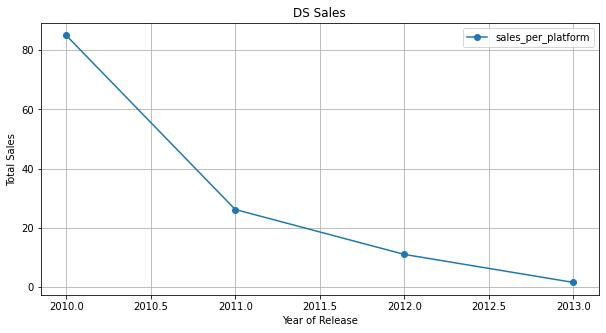

In [46]:
# 'DS' Sales per year
(platform_sales_filtered
 .query('platform == "DS"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(10, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('DS Sales')
plt.show()

The DS sales considerately deacreased from 2010 to 2011. This platform practically disappeared in 2013.

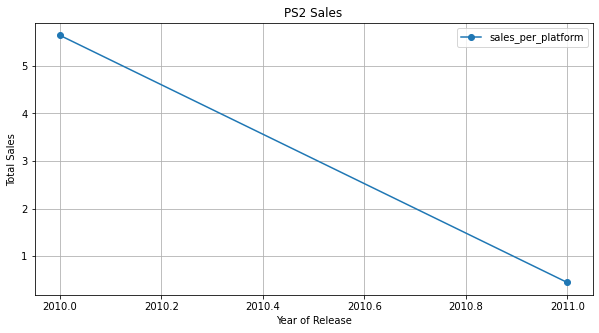

In [47]:
# 'PS2' Sales per year
(platform_sales_filtered
 .query('platform == "PS2"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(10, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('PS2 Sales')
plt.show()

The Ps2 sales also deacreased from 2010 to 2011. This platform practically disappeared in 2011.

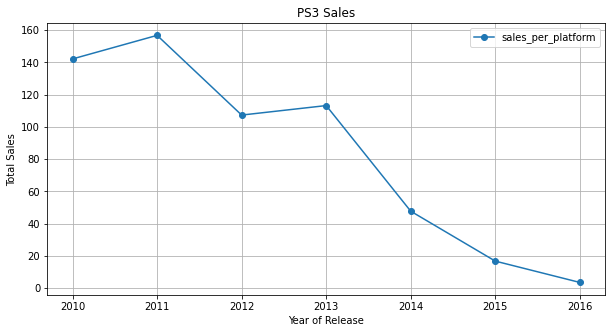

In [48]:
# 'PS3' Sales per year
(platform_sales_filtered
 .query('platform == "PS3"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(10, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('PS3 Sales')
plt.show()

PS3 sales started deacreasing in 2012. This platform practically disappeared in 2016.

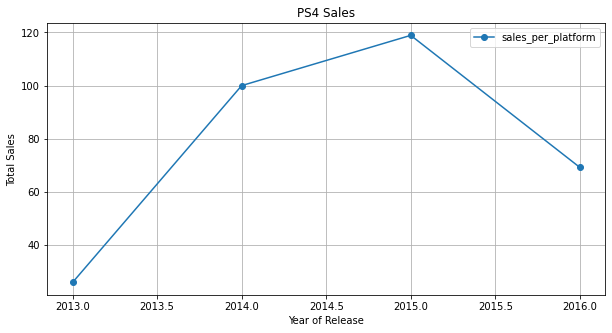

In [49]:
# 'PS4' Sales per year
(platform_sales_filtered
 .query('platform == "PS4"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(10, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('PS4 Sales')
plt.show()

PS3 sales increased from 2013 to 2015. This platform practically is still in the market in 2016.

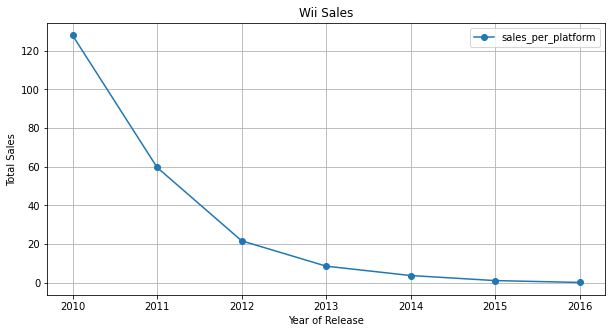

In [50]:
# 'Wii' Sales per year
(platform_sales_filtered
 .query('platform == "Wii"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(10, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('Wii Sales')
plt.show()

Wii sales started deacreasing in 2011. This platform practically disappeared in 2016.

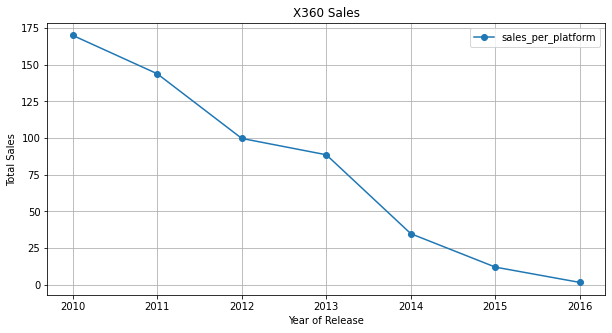

In [51]:
# 'X360' Sales per year
(platform_sales_filtered
 .query('platform == "X360"')
 .pivot_table(index='year_of_release', values='sales_per_platform')
 .plot(style='o-', grid=True, figsize=(10, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Total Sales")
plt.title('X360 Sales')
plt.show()

X360 sales started deacreasing from in 2011. This platform practically disappeared in 2016.

After analyzing the filtered platforms over the last 6 years, we can conclude that:
- The platform leading in sales is **PS4**. This is the only platform that is actually having some considerable sales over the last couple of years. In the last year (2016), its sales started shrinking).

- Some platforms haven't been selling for a few years now (*DS, PS2*).

- It is good to notice that between 2010-2011, the best selling platforms were *PS3, Wii, X360*.

- The rest of the platforms (*PS3, Wii, X360*) plummeted from 2014, almost to zero.

- In summary, the only platform that is still potentially profitable is *PS4*, since it only has 3 years in the market, and the rest are mostly discontinued.


### Global Sales

In [52]:
# Global sales per platform
global_sales = platform_sales_filtered.pivot_table(index='platform', values='sales_per_platform', aggfunc='sum')

global_sales.rename(columns = {"sales_per_platform": "global_sales"},  
          inplace = True)

global_sales.head()

,global_sales
platform,
DS,123.75
PS2,6.09
PS3,587.74
PS4,314.14
Wii,222.97


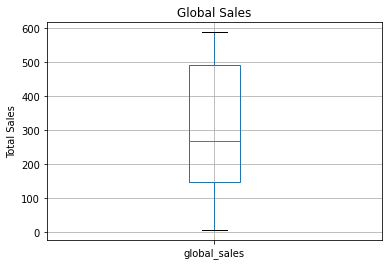

In [53]:
# create a boxplot
global_sales.boxplot('global_sales')
plt.ylabel("Total Sales")
plt.title('Global Sales');

In [54]:
sales_average = platform_sales_filtered.pivot_table(index='platform', values='sales_per_platform', aggfunc='mean')

sales_average.rename(columns = {"sales_per_platform": "sales_average"},  
          inplace = True)

sales_average.sort_values('sales_average', ascending=False)

,sales_average
platform,
PS3,83.962857
X360,78.630000
PS4,78.535000
Wii,31.852857
DS,30.937500
PS2,3.045000


After breaking down the global sales by platform and looking at the average sales of each one during this period of time, we have the following findings:

- The 3 top platforms in global sales were: *PS3, X360 and PS4*.

- Some of these platforms have a significant difference in sales. This may be due to the fact that some of these platforms where discontinued completely during this 6-years period.

- The sales average of X360 and PS3 don't have a considerate difference. This may be due to the fact that these 2 platforms were in the market for almost the same period, and amount of time.

- Also, DS and Wii had a similar sales average.

- The average sales of PS2 was minimum compared to the top 3. This shows that this platform was almost obsolete by 2010.

- We believe that PS4 sales will increase in the near future, because the platform only has 3 years in the market (relatively new). 

### User and professional reviews

For this part of the analisis we will evaluate the information of the platform **PS3**, because it was a very famous platform and one of the top 3 in sales in the last 6 years.

In [56]:
ps3_data = filtered_platforms.query('platform == "PS3"')
ps3_data.reset_index().head(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.200000,M,21.05
1,34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.300000,M,13.79
2,37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.200000,M,13.33
3,41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.400000,M,12.63
4,54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.500000,E,10.70
5,69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.600000,M,9.36
6,81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.600000,E,8.17
7,104,Battlefield 3,PS3,2011,Shooter,2.85,2.89,0.35,1.08,85.0,7.500000,M,7.17
8,118,Uncharted 3: Drake's Deception,PS3,2011,Action,2.77,2.75,0.19,1.03,92.0,8.300000,T,6.74
9,122,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,71.0,7.125046,not rated,6.64


0.3609


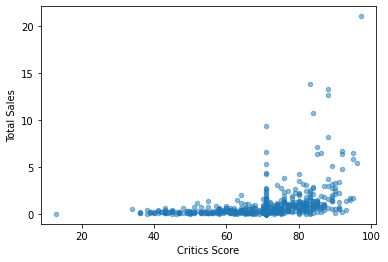

In [57]:
# correlation between critic score and total sales
print(ps3_data['critic_score'].corr(ps3_data['total_sales']).round(4))

ps3_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.xlabel('Critics Score')
plt.ylabel('Total Sales')
plt.show();

0.0122


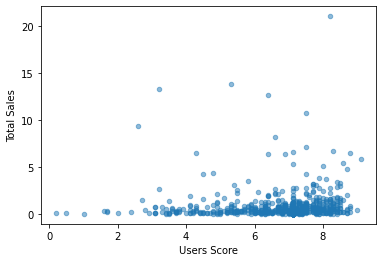

In [58]:
# correlation between critic score and total sales
print(ps3_data['user_score'].corr(ps3_data['total_sales']).round(4))

ps3_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.xlabel('Users Score')
plt.ylabel('Total Sales')

plt.show();

- After looking at these scatter plots, we can conclude that the Users Score doesn't really affect much the sales of a game.

- We can see though, that there is a minimal positive correlation between the Critics Score and the sales of a game. This could mean that maybe the critics score is considered by gamers when the game is about to be released.

### Games in different platforms

We will now compare the sales of some of the most popular games in this platform, with the same games in other platforms.
Considering the best or top games for each platform, according to an external review, we will evaluate the following games:
- Grand Theft Auto V
- Portal 2
- Red Dead Redemption
- Dark Souls

**Best games:**
[PS2](https://www.gamesradar.com/best-ps2-games-all-time/3/)
[PS3](https://www.gamesradar.com/best-ps3-games/3/)
[PS4](https://www.gamesradar.com/best-ps4-games/3/)
[X360](https://www.gamesradar.com/best-xbox-360-games/5/)

In [59]:
# filter game 'Grand Theft Auto V'
grand_data = filtered_platforms.query('name == "Grand Theft Auto V"')
grand_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [60]:
# filter game 'portal 2'
portal_data = filtered_platforms.query('name == "Portal 2"')
portal_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
808,Portal 2,X360,2011,Shooter,1.41,0.49,0.01,0.17,95.0,8.5,E10+,2.08
1052,Portal 2,PS3,2011,Shooter,0.83,0.60,0.02,0.24,95.0,8.4,E10+,1.69


In [61]:
# filter game 'Red Dead Redemption'
red_data = filtered_platforms.query('name == "Red Dead Redemption"')
red_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
125,Red Dead Redemption,PS3,2010,Action,2.79,2.53,0.17,0.99,95.0,8.8,M,6.48
135,Red Dead Redemption,X360,2010,Action,3.70,1.95,0.09,0.58,95.0,9.0,M,6.32


In [62]:
# filter game 'Dark Souls'
dark_data = filtered_platforms.query('name == "Dark Souls"')
dark_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
845,Dark Souls,PS3,2011,Role-Playing,0.75,0.51,0.54,0.22,89.0,8.7,M,2.02
2091,Dark Souls,X360,2011,Role-Playing,0.64,0.27,0.00,0.09,89.0,8.4,M,1.00


After comparing 4 of the most popular games in PS3, with their versions in other platforms, we can see that:
- *Grand Theft Auto V* in PS3, X360 and PS4
    * The game had the same critic Score (97.0) in the three platforms.
    * The user score varied a little from one platform to another.
    * The sales were significantly higher in PS3 than in X360 and PS4.
    
    
- *Portal 2* in PS3 and X360
    * The game had the same critic Score (95.0) in the both platforms.
    * The user score varied very little (0.1) from one platform to another.
    * The sales were a bit higher in X360 than in PS3.
    
    
- *Red Dead Redemption* in PS3 and X360
    * The game had the same critic Score (95.0) in the both platforms.
    * The user score varied very little (0.2) from one platform to another.
    * The sales were vey similiar both in X360 and PS3.
    
    
- *Dark Souls* in PS3 and X360
    * The game had the same critic Score (89.0) in the both platforms.
    * The user score was higher in PS3 than in X360 (0.3).
    * The sales were the double in PS3 of the sales in X360.
    

### Games by Genre

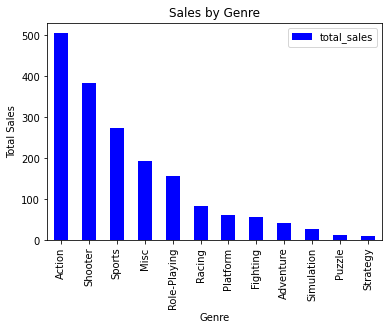

In [63]:
# total sales by genre
genre_data = filtered_platforms.pivot_table(index='genre', values='total_sales', aggfunc= 'sum')
genre_data.sort_values(by='total_sales', ascending=False).plot(kind='bar', color='b')
plt.xlabel("Genre")
plt.ylabel("Total Sales")
plt.title('Sales by Genre')
plt.show();

* As we can see in this bar chart, the *most profitable genres* are:
    - Action
    - Shooter
    - Sports 

* Adventure, Puzzle and Strategy genres are the lowest in sales.

Video game sales in USA in [2018](https://www.statista.com/statistics/189592/breakdown-of-us-video-game-sales-2009-by-genre/)

## Step 4. User profile for each region

In [64]:
# region sales per platform
platform_data = filtered_platforms.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# total region sales per platform
platform_data['region_sales'] = platform_data['eu_sales'] + platform_data['jp_sales'] + platform_data['na_sales']
platform_data.sort_values('region_sales', ascending=False)

,eu_sales,jp_sales,na_sales,region_sales
platform,,,,
X360,163.41,5.46,334.18,503.05
PS3,213.60,59.26,229.25,502.11
PS4,141.09,15.96,108.74,265.79
Wii,65.91,17.75,121.20,204.86
DS,28.06,27.90,59.66,115.62
PS2,1.67,0.80,2.32,4.79


In [65]:
# regional market share per platform
platform_data['eu_market_share'] = (platform_data['eu_sales'] / platform_data['region_sales']) * 100
platform_data['jp_market_share'] = (platform_data['jp_sales'] / platform_data['region_sales']) * 100
platform_data['na_market_share'] = (platform_data['na_sales'] / platform_data['region_sales']) * 100
platform_data['region_market_share'] = platform_data['eu_market_share'] + platform_data['jp_market_share'] + platform_data['na_market_share']
platform_data.sort_values('region_sales', ascending=False)

,eu_sales,jp_sales,na_sales,region_sales,eu_market_share,jp_market_share,na_market_share,region_market_share
platform,,,,,,,,
X360,163.41,5.46,334.18,503.05,32.483849,1.085379,66.430772,100.0
PS3,213.60,59.26,229.25,502.11,42.540479,11.802195,45.657326,100.0
PS4,141.09,15.96,108.74,265.79,53.083261,6.004741,40.911998,100.0
Wii,65.91,17.75,121.20,204.86,32.173191,8.664454,59.162355,100.0
DS,28.06,27.90,59.66,115.62,24.269158,24.130773,51.600069,100.0
PS2,1.67,0.80,2.32,4.79,34.864301,16.701461,48.434238,100.0


In [66]:
# region sales per genre
genre_data = filtered_platforms.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# total region sales per genre
genre_data['region_sales'] = genre_data['eu_sales'] + genre_data['jp_sales'] + genre_data['na_sales']
genre_data.sort_values('region_sales', ascending=False)

,eu_sales,jp_sales,na_sales,region_sales
genre,,,,
Action,182.43,33.41,226.28,442.12
Shooter,136.02,11.72,187.48,335.22
Sports,95.85,8.96,134.63,239.44
Misc,56.55,10.39,109.43,176.37
Role-Playing,41.62,36.35,64.09,142.06
Racing,39.54,2.32,30.50,72.36
Platform,19.43,5.56,30.18,55.17
Fighting,14.76,7.25,27.59,49.60
Adventure,14.64,4.67,17.47,36.78


In [67]:
# regional market share per genre
genre_data['eu_market_share'] = (genre_data['eu_sales'] / genre_data['region_sales']) * 100
genre_data['jp_market_share'] = (genre_data['jp_sales'] / genre_data['region_sales']) * 100
genre_data['na_market_share'] = (genre_data['na_sales'] / genre_data['region_sales']) * 100
genre_data['region_market_share'] = genre_data['eu_market_share'] + genre_data['jp_market_share'] + genre_data['na_market_share']
genre_data.sort_values('region_sales', ascending=False)

,eu_sales,jp_sales,na_sales,region_sales,eu_market_share,jp_market_share,na_market_share,region_market_share
genre,,,,,,,,
Action,182.43,33.41,226.28,442.12,41.262553,7.556772,51.180675,100.0
Shooter,136.02,11.72,187.48,335.22,40.576338,3.496211,55.927451,100.0
Sports,95.85,8.96,134.63,239.44,40.030905,3.742065,56.227030,100.0
Misc,56.55,10.39,109.43,176.37,32.063276,5.891025,62.045699,100.0
Role-Playing,41.62,36.35,64.09,142.06,29.297480,25.587780,45.114740,100.0
Racing,39.54,2.32,30.50,72.36,54.643449,3.206191,42.150359,100.0
Platform,19.43,5.56,30.18,55.17,35.218416,10.077941,54.703643,100.0
Fighting,14.76,7.25,27.59,49.60,29.758065,14.616935,55.625000,100.0
Adventure,14.64,4.67,17.47,36.78,39.804241,12.697118,47.498641,100.0


In [68]:
# region sales per ESRB (age_rating)
rating_data = filtered_platforms.pivot_table(index='age_rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# total region sales per age rating
rating_data['region_sales'] = rating_data['eu_sales'] + rating_data['jp_sales'] + rating_data['na_sales']
rating_data.sort_values('region_sales', ascending=False)

,eu_sales,jp_sales,na_sales,region_sales
age_rating,,,,
M,233.48,25.75,310.41,569.64
E,139.28,17.67,203.88,360.83
not rated,89.73,54.43,98.63,242.79
T,79.72,24.78,120.94,225.44
E10+,71.53,4.50,120.45,196.48
EC,0.00,0.00,1.04,1.04


In [69]:
# regional market share per ESRB(age_rating)
rating_data['eu_market_share'] = (rating_data['eu_sales'] / rating_data['region_sales']) * 100
rating_data['jp_market_share'] = (rating_data['jp_sales'] / rating_data['region_sales']) * 100
rating_data['na_market_share'] = (rating_data['na_sales'] / rating_data['region_sales']) * 100
rating_data['region_market_share'] = rating_data['eu_market_share'] + rating_data['jp_market_share'] + rating_data['na_market_share']
rating_data.sort_values('region_sales', ascending=False)

,eu_sales,jp_sales,na_sales,region_sales,eu_market_share,jp_market_share,na_market_share,region_market_share
age_rating,,,,,,,,
M,233.48,25.75,310.41,569.64,40.987290,4.520399,54.492311,100.0
E,139.28,17.67,203.88,360.83,38.599895,4.897043,56.503062,100.0
not rated,89.73,54.43,98.63,242.79,36.957865,22.418551,40.623584,100.0
T,79.72,24.78,120.94,225.44,35.361959,10.991838,53.646203,100.0
E10+,71.53,4.50,120.45,196.48,36.405741,2.290309,61.303950,100.0
EC,0.00,0.00,1.04,1.04,0.000000,0.000000,100.000000,100.0


### Conclusions: 

- The 5 top selling platforms were: X360, PS3, PS4, Wii and DS.
    * In these 5 platforms, North America sales have over 40% of the market share, followed by the European Region. Japan has the smallest market share in every platform.
    * In PS4 the european union had over 50% of the market share. So is was more attractive in this region than in North America.
    
    
- The 5 top selling genres were: *Action, Shooter, Sports, Miscelaneous and Role-Playing.
    * In these 5 genres, North America sales take over 50% of the market share, followed by the European Region.
    * Each of these 5 genres have generated over 235mm USD in sales.
    * The most attractive genre in Japan region is Role-Playing.
    
    
- We can say that the 2 age ratings *M, T* generate the highest sales. 
    * Also, in these 3 age ratings, North America region has the biggest share of the market, with over 50%. So, we can infer that the age rating does affect the sales in individual regions.

## Step 5. Test the following hypotheses:

### "Average user ratings of the Xbox One and PC platforms are the same."

In [70]:
# filter the information for platform XOne
xone_data = games_data.query('platform =="XOne"')
xone_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,71.0,7.125046,not rated,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.900000,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.400000,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.400000,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.200000,M,4.22
342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,71.0,7.125046,not rated,3.66
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.100000,M,3.50
398,Destiny,XOne,2014,Shooter,2.14,0.92,0.00,0.31,75.0,5.500000,T,3.37
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.500000,M,3.28
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.400000,E,3.25


In [71]:
xone_data.shape[0]

247

In [72]:
# XOne user_score average
xone_data['user_score'].mean()

6.680275292975524

In [73]:
# filter the information for platform PC
pc_data = games_data.query('platform =="PC"')
pc_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.0,0.60,86.0,7.600000,T,8.01
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.0,0.00,93.0,7.300000,T,6.29
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.000000,M,5.14
195,Microsoft Flight Simulator,PC,1996,Simulation,3.22,1.69,0.0,0.20,71.0,7.125046,not rated,5.11
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.0,0.58,93.0,8.200000,T,4.83


In [74]:
pc_data.shape[0]

957

In [75]:
# PC user_score average
pc_data['user_score'].mean()

7.0784318859853865

After looking at the collected data of the platforms XboxOne and PC. We believe that the average user score is not the same for these two platforms.

So considering that there are two different population we can formulate the following hypotheses: 

**Null Hypothesis**

*'The average user rating of the Xbox One and PC platforms are equal'*
    
**Alternative Hypothesis**

*The average user rating of the Xbox One and PC platforms are not equal'*

In [76]:
# seed the random number generator
seed(1)

# our samples are(data):
xbox_rating = xone_data['user_score']
pc_rating = pc_data['user_score']

# summarize
print('xbox_rating: mean=%.3f stdv=%.3f' % (mean(xbox_rating), std(xbox_rating)))
print('pc_rating: mean=%.3f stdv=%.3f' % (mean(pc_rating), std(pc_rating)))

xbox_rating: mean=6.680 stdv=1.212
pc_rating: mean=7.078 stdv=1.361


In [77]:
# critical statistical significance level
alpha = 0.05

stat, p = mannwhitneyu(xbox_rating, pc_rating)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=89437.500, p=0.000


In [78]:
# results of mannwhitneyu U Test
if p > alpha:
    print('Same distribution (fail to reject the null hypothesis)')
else:
    print('Different distribution (We reject the null hypothesis)')

Different distribution (We reject the null hypothesis)


**We can say that we have reason to reject the null hypothesis (H0).** 

**Which would imply that *the average user ratings of the Xbox One and PC platforms are not equal* (H1 Hypothesis)**

### "Average user ratings for the Action and Sports genres are different."

In [79]:
# filter the information for Action genre 
action_data = games_data.query('genre =="Action"')
action_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10


In [80]:
action_data.shape[0]

3307

In [81]:
# Action games average user score
action_data['user_score'].mean()

7.088704166073897

In [82]:
# filter the information for Sports genre 
sport_data = games_data.query('genre =="Sports"')
sport_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [83]:
sport_data.shape[0]

2306

In [84]:
# Action games average user score
sport_data['user_score'].mean()

7.043660662966848

After looking at the collected data of the genres Action and Sports. We believe that the average user score is similar for these two genres.

So considering that there are two different population we can formulate the following hypotheses: 

**Null Hypothesis**

*'The average user rating for the Action and Sports genre are equal'*
    
**Alternative Hypothesis**

*The average user rating for the Action and Sports genre are not equal'*

In [85]:
# seed the random number generator
seed(1)

# our samples are(data):
action_rating = action_data['user_score']
sport_rating = sport_data['user_score']

# summarize
print('action_rating: mean=%.3f stdv=%.3f' % (mean(action_rating), std(action_rating)))
print('sport_rating: mean=%.3f stdv=%.3f' % (mean(sport_rating), std(sport_rating)))

action_rating: mean=7.089 stdv=1.050
sport_rating: mean=7.044 stdv=1.112


In [86]:
# critical statistical significance level
alpha = 0.05

stat, p = mannwhitneyu(action_rating, sport_rating)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=3745972.000, p=0.116


In [87]:
# results of mannwhitneyu U Test
if p > alpha:
    print('Same distribution (fail to reject the null hypothesis)')
else:
    print('Different distribution (We reject the null hypothesis)')

Same distribution (fail to reject the null hypothesis)


**After applying the UTest to the samples from the Action genre and the Sports genre, we can say that both samples seem to have the same distribution, so we have no reason to reject the null hypothesis (H0).** 

**Which would mean that *The average user rating for the Action and Sports genre are not different**

## Step 6. General Conclusion

We started our analysis with preprocessing the original data we had collected. Here we made some changes that would have an important impact on our further analysis. These modifications included changing some data types in order to have a better understanding of the information provided and then be able to perform some calculations on it. We also had to the with the missing values found in the original data, trying not to alterate it significantly and still be able to use it further.

- There was a particular case with the *'user_score'* column that had the *object* type and a significant amount of rows were filled with 'tbd' instead of a float number indicating the score.
    *Because we couldn't find any valid information that could help us fill these rows with an actual score, we decided to changed its type to *float* to fill these missing values with the columns average or mean.*
    *We would like to make the observation, that we believe this choice of filling these missing values didn't affect our study in any significant way.*
 
- The missing values could have been a result of some technical errors during the data collection, loading and so on. 
As we can see, the missing values of the columns 'critic_score', ''user_score, and 'age_rating' concur in the same row.


After we loaded the original data, and we proceeded to prepare in and the analyze it, we were able to draw some interesting conclusions:

- We could see that the amount of games released per years started increasing significantly from 1994, with more than 200 games per year.

- The highest amount of games released in a year was between 2008 and 2009.

- The eight platforms with the greatest total sales (above 300mm USD) are: **PS2, X360, PS3, Wii, DS, PS, PS4, GBA**

- Out of these 8 top selling platforms we can see that:
    * Only the *PS4* had over 60mm USD of sales by 2016. This is mainly because, the majority of the other platforms have been discontinued (PS - PS2 -Ps3...). The rest of the platforms had almost zero sales by 2016.
    * In the case of the *PS* series, the new platform version was released every 6 years. 
    * And it would usually take each platform around 8-10 years after their release to completely disappear.

After looking at the best selling platforms and their years, we decided to evaluate the data from the year 2010, since most of the platforms and games were released or were being sold during the period corresponding to 2010-2016, and the period of success for each platform is from 3-5 years.

After analyzing the filtered platforms over the last 6 years, we can conclude that:
- The platform leading in sales is **PS4**. This is the only platform that is actually having some considerable sales over the last couple of years. In the last year (2016), its sales started shrinking).
- We can say that the only platform that is still potentially profitable is *PS4*, since it only has 3 years in the market, and the rest are mostly discontinued.


After breaking down the global sales by platform and looking at the average sales of each one during this period of time, we have the following findings:

- The 3 top platforms in global sales were: *PS4, X360 and PS3*.

- Some of these platforms have a significant difference in sales. This may be due to the fact that some of these platforms where discontinued completely during this 6-years period.

- The sales average of X360 and PS3 don't have a considerate difference. This may be due to the fact that these 2 platforms were in the market for almost the same period, and amount of time.

- We believe that PS4 sales will increase in the near future, because the platform only has 3 years in the market (relatively new).

- After further analysis of the platforms with highest sales, we can conclude that the Users Score doesn't really affect much the sales of a game. This may be due to the fact that users normally rate a game after they have actually bought and used it.


After comparing the sales of some of the most popular games in this platform, with the same games in other platforms, we can conclude that:
- The 3 top selling platforms were: X360, PS3, and PS4
   
- The 5 top selling genres were: *Action, Shooter, Sports, Miscelaneous and Role-Playing. Each of these 5 genres have generated over 335mm USD in sales.

- The top 2 age ratings *M and E* generate the highest sales. Also, in these age ratings, North America region has the biggest share of the market, with over 50%.


After testing our 2 hypotheses, we could infer that:
- We can say that we have reason to reject the null hypothesis (H0).** **Which would imply that *the average user ratings of the Xbox One and PC platforms are not equal* (H1 Hypothesis)**

- After applying the UTest to the samples from the Action genre and the Sports genre, we can say that both samples seem to have the same distribution, so we have no reason to reject the null hypothesis (H0). Which would mean that *The average user rating for the Action and Sports genre are not different.
